#### Generate fake data

In [1]:
from faker import Faker
from random import randrange

f = Faker()
output = [[f.name(), f.address(), f.city(), f.state(), f.email(), 10 + randrange(70)]
    for _ in range(1000)]
output

[['Steven Sharp',
  '82919 Lopez Drive\nPort Laura, AZ 93450',
  'Stevebury',
  'Idaho',
  'qelliott@example.net',
  43],
 ['Cheryl Brooks',
  '624 Ross Bypass Apt. 025\nJohnsonborough, IA 03334',
  'Port Matthewfurt',
  'Massachusetts',
  'cooperjennifer@example.org',
  11],
 ['Kevin Johnson',
  '33100 Stacy Route Suite 525\nSouth Vanessa, KY 71688',
  'Karenville',
  'West Virginia',
  'clarkesara@example.org',
  21],
 ['David Wilson',
  '2960 Andrew Mountain\nPort Ronald, GA 53026',
  'Robinsonhaven',
  'Alaska',
  'holmeselizabeth@example.com',
  24],
 ['William Salas',
  '7065 Jesse Green\nEast Angela, PW 20373',
  'New Debra',
  'Iowa',
  'erika82@example.com',
  31],
 ['Richard Miller',
  '1609 John Light\nSouth Jamestown, AK 71134',
  'Evansmouth',
  'Iowa',
  'qlopez@example.com',
  12],
 ['Keith Barker',
  '63108 Natalie Trail\nSouth Joshuashire, WI 42701',
  'Sherryshire',
  'Colorado',
  'jaimemartin@example.net',
  19],
 ['Thomas Marsh',
  '37129 Tanner Rest\nPort Sean, NM

#### Connect to Snowflake

In [2]:
import os
from snowflake.snowpark import Session

pars = {
    "account": os.environ['SNOWFLAKE_ACCOUNT'],
    "user": os.environ['SNOWFLAKE_USER'],
    "password": os.environ['SNOWFLAKE_PASSWORD'],
    "database": "test",
    "schema": "public"
}
session = Session.builder.configs(pars).create()
session.get_current_warehouse(), session.get_current_role()

c:\Projects\snowflake-apps\venv\Lib\site-packages\snowflake\connector\config_manager.py:351: UserWarning: Bad owner or permissions on C:\Users\crist\.snowflake\config.toml
  warn(f"Bad owner or permissions on {str(filep)}{chmod_message}")
c:\Projects\snowflake-apps\venv\Lib\site-packages\snowflake\connector\config_manager.py:351: UserWarning: Bad owner or permissions on C:\Users\crist\.snowflake\connections.toml
  warn(f"Bad owner or permissions on {str(filep)}{chmod_message}")


('"COMPUTE_WH"', '"ACCOUNTADMIN"')

#### Create Snowpark DataFrame

In [3]:
from snowflake.snowpark.types import StructType, StructField, StringType, IntegerType

schema = StructType([ 
    StructField("NAME", StringType(), False),  
    StructField("ADDRESS", StringType(), False), 
    StructField("CITY", StringType(), False),  
    StructField("STATE", StringType(), False),  
    StructField("EMAIL", StringType(), False),
    StructField("AGE", IntegerType(), False)
])
df = session.create_dataframe(output, schema=schema)
df.show()

------------------------------------------------------------------------------------------------------------------------------
|"NAME"            |"ADDRESS"                       |"CITY"              |"STATE"        |"EMAIL"                    |"AGE"  |
------------------------------------------------------------------------------------------------------------------------------
|Steven Sharp      |82919 Lopez Drive               |Stevebury           |Idaho          |qelliott@example.net       |43     |
|                  |Port Laura, AZ 93450            |                    |               |                           |       |
|Cassandra Young   |16827 Cordova Divide Suite 787  |Port Scott          |West Virginia  |sarah55@example.org        |47     |
|                  |Williamhaven, TN 33948          |                    |               |                           |       |
|Allen Rose        |3609 Reginald Plains Apt. 974   |Grahamborough       |Iowa           |collinskim@example.or

#### Save in table

In [4]:
df.write.mode("overwrite").save_as_table("customers_fake")

#### Transform data

In [5]:
df = session.table("customers_fake")
df.update({"AGE": 20}, df["AGE"] < 20)

UpdateResult(rows_updated=156, multi_joined_rows_updated=0)

#### Check back data

In [6]:
query = 'select * from customers_fake limit 1000'
df = session.sql(query).collect()
df

[Row(NAME='Steven Sharp', ADDRESS='82919 Lopez Drive\nPort Laura, AZ 93450', CITY='Stevebury', STATE='Idaho', EMAIL='qelliott@example.net', AGE=43),
 Row(NAME='Cassandra Young', ADDRESS='16827 Cordova Divide Suite 787\nWilliamhaven, TN 33948', CITY='Port Scott', STATE='West Virginia', EMAIL='sarah55@example.org', AGE=47),
 Row(NAME='Allen Rose', ADDRESS='3609 Reginald Plains Apt. 974\nMathewschester, IN 64108', CITY='Grahamborough', STATE='Iowa', EMAIL='collinskim@example.org', AGE=66),
 Row(NAME='Leah Foster', ADDRESS='289 Jones Lodge Suite 925\nRomerostad, NY 22129', CITY='Petersonshire', STATE='Minnesota', EMAIL='paul28@example.org', AGE=41),
 Row(NAME='Laura Howard', ADDRESS='71079 Mary Light Apt. 359\nLongview, NY 07799', CITY='Olsenborough', STATE='Kansas', EMAIL='whiteandrea@example.org', AGE=46),
 Row(NAME='William Gomez', ADDRESS='215 Rhodes Vista\nEast Daniel, MS 09314', CITY='Bryantberg', STATE='Connecticut', EMAIL='donald05@example.net', AGE=39),
 Row(NAME='Christian Miller

#### Show a plot

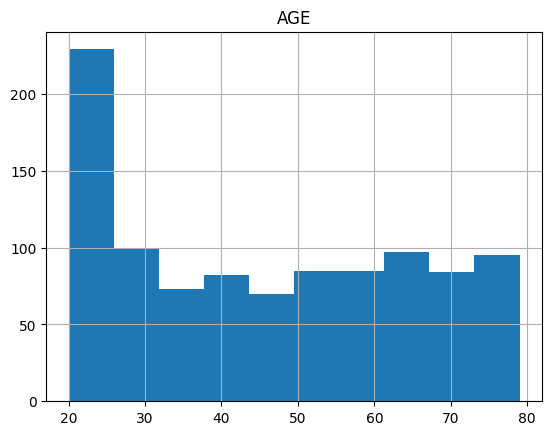

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(df).hist(column="AGE", bins=10)
plt.show()